In [6]:
# Import all the important functionalities from Keras
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from matplotlib import pyplot as plt

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)




x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 19s 321us/step - loss: 0.8310 - accuracy: 0.7444 - val_loss: 0.2627 - val_accuracy: 0.9221
Epoch 2/12
60000/60000 [==============================] - 19s 321us/step - loss: 0.2344 - accuracy: 0.9301 - val_loss: 0.1932 - val_accuracy: 0.9405
Epoch 3/12
60000/60000 [==============================] - 19s 319us/step - loss: 0.1817 - accuracy: 0.9455 - val_loss: 0.1549 - val_accuracy: 0.9538
Epoch 4/12
60000/60000 [==============================] - 19s 319us/step - loss: 0.1516 - accuracy: 0.9546 - val_loss: 0.1281 - val_accuracy: 0.9620
Epoch 5/12
60000/60000 [==============================] - 19s 319us/step - loss: 0.1307 - accuracy: 0.9612 - val_loss: 0.1130 - val_accuracy: 0.9651
Epoch 6/12
60000/60000 [==============================] - 19s 320us/step - loss: 0.1154 - accuracy: 0.9659 - val_loss: 0.1025 - val_accuracy: 0.9687
Epoch 7/12
60000/60000 [==============================] 

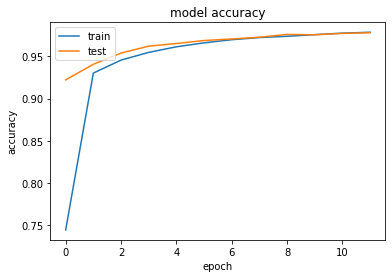

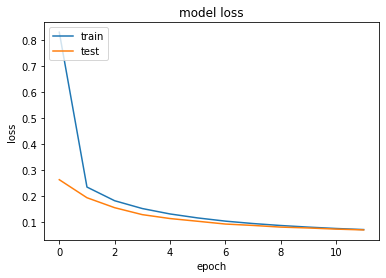

Test loss: 0.06917221449492499
Test accuracy: 0.9779000282287598


In [7]:
# Model 1
# Baseline Configuration
model = Sequential()
model.add(Conv2D(6, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
# https://keras.io/optimizers/ 
model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=keras.optimizers.Adadelta(lr=0.1, rho=0.95,  decay=0.0), metrics=["accuracy"])

val = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1,validation_data=(x_test, y_test))
plt.plot(val.history['accuracy'])
plt.plot(val.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(val.history['loss'])
plt.plot(val.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 22s 369us/step - loss: 0.7538 - accuracy: 0.7804 - val_loss: 0.2516 - val_accuracy: 0.9251
Epoch 2/12
60000/60000 [==============================] - 22s 370us/step - loss: 0.2243 - accuracy: 0.9327 - val_loss: 0.1740 - val_accuracy: 0.9478
Epoch 3/12
60000/60000 [==============================] - 22s 373us/step - loss: 0.1719 - accuracy: 0.9489 - val_loss: 0.1408 - val_accuracy: 0.9582
Epoch 4/12
60000/60000 [==============================] - 22s 372us/step - loss: 0.1426 - accuracy: 0.9581 - val_loss: 0.1247 - val_accuracy: 0.9641
Epoch 5/12
60000/60000 [==============================] - 22s 375us/step - loss: 0.1225 - accuracy: 0.9638 - val_loss: 0.1090 - val_accuracy: 0.9663
Epoch 6/12
60000/60000 [==============================] - 22s 374us/step - loss: 0.1085 - accuracy: 0.9675 - val_loss: 0.0939 - val_accuracy: 0.9713
Epoch 7/12
60000/60000 [==============================] 

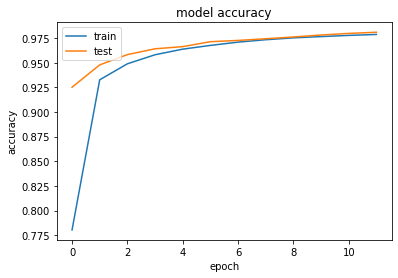

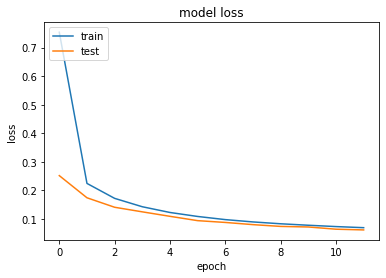

Test loss: 0.06141008994122967
Test accuracy: 0.98089998960495


In [8]:
# Model 2
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
# https://keras.io/optimizers/ 
model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=keras.optimizers.Adadelta(lr=0.1, rho=0.95, decay=0.0), metrics=['accuracy'])
val = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1,validation_data=(x_test, y_test))
plt.plot(val.history['accuracy'])
plt.plot(val.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(val.history['loss'])
plt.plot(val.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 21s 349us/step - loss: 0.7170 - accuracy: 0.7986 - val_loss: 0.2231 - val_accuracy: 0.9334
Epoch 2/12
60000/60000 [==============================] - 21s 348us/step - loss: 0.1937 - accuracy: 0.9420 - val_loss: 0.1496 - val_accuracy: 0.9579
Epoch 3/12
60000/60000 [==============================] - 20s 342us/step - loss: 0.1438 - accuracy: 0.9571 - val_loss: 0.1147 - val_accuracy: 0.9653
Epoch 4/12
60000/60000 [==============================] - 20s 340us/step - loss: 0.1182 - accuracy: 0.9641 - val_loss: 0.1001 - val_accuracy: 0.9684
Epoch 5/12
60000/60000 [==============================] - 21s 342us/step - loss: 0.1023 - accuracy: 0.9683 - val_loss: 0.0916 - val_accuracy: 0.9720
Epoch 6/12
60000/60000 [==============================] - 21s 345us/step - loss: 0.0911 - accuracy: 0.9720 - val_loss: 0.0771 - val_accuracy: 0.9763
Epoch 7/12
60000/60000 [==============================] 

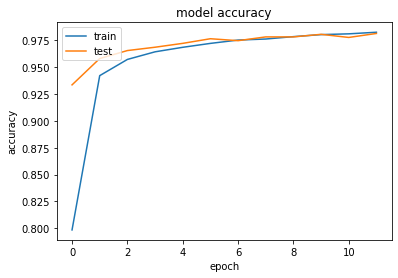

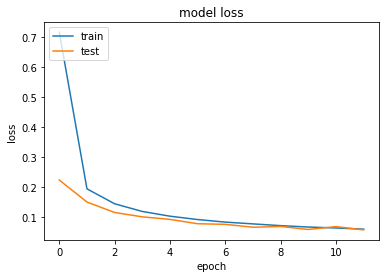

Test loss: 0.0564347909626551
Test accuracy: 0.9811999797821045


In [13]:
# Model 3 
# different number of feature maps in first and second convolution layer
model = Sequential()
model.add(Conv2D(10, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(22, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
# https://keras.io/optimizers/ 
model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=keras.optimizers.Adadelta(lr=0.1, rho=0.95, decay=0.0), metrics=['accuracy'])
val = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1,validation_data=(x_test, y_test))
plt.plot(val.history['accuracy'])
plt.plot(val.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(val.history['loss'])
plt.plot(val.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])